In [1]:
# 0) Imports
import numpy as np, pandas as pd, math
import torch, torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import pandas as pd, numpy as np, torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
df1 = pd.read_excel("./cleaned.xlsx")
print(df1.head())

       TIMESTAMP  TARGETVAR       U10       V10      U100      V100  \
0  20120101 1:00   0.000000  2.124600 -2.681966  2.864280 -3.666076   
1  20120101 2:00   0.054879  2.521695 -1.796960  3.344859 -2.464761   
2  20120101 3:00   0.110234  2.672210 -0.822516  3.508448 -1.214093   
3  20120101 4:00   0.165116  2.457504 -0.143642  3.215233 -0.355546   
4  20120101 5:00   0.156940  2.245898  0.389576  2.957678  0.332701   

             DATETIME  
0 2012-01-01 01:00:00  
1 2012-01-01 02:00:00  
2 2012-01-01 03:00:00  
3 2012-01-01 04:00:00  
4 2012-01-01 05:00:00  


In [ ]:
##################3                             don't run this




# 0) After you've built df_clean
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)

# A) Drop rows with missing TARGET (best for supervised learning)
n_before = len(df_clean)
df_clean = df_clean.dropna(subset=[TARGET_COL]).copy()
print(f"Dropped {n_before - len(df_clean)} rows with missing target.")

# =========================
# 2) Chronological split
# =========================
n = len(df_clean)
train_n = int(0.8 * n)
train_df = df_clean.iloc[:train_n].copy()
test_df  = df_clean.iloc[train_n:].copy()

# B) If features have NaNs, impute them using train stats only
from sklearn.impute import SimpleImputer
feat_cols = [c for c in df_clean.columns if c != TARGET_COL]

x_imputer = SimpleImputer(strategy="median")
X_train = x_imputer.fit_transform(train_df[feat_cols])
X_test  = x_imputer.transform(test_df[feat_cols])

y_train = train_df[TARGET_COL].to_numpy().reshape(-1, 1)
y_test  = test_df[TARGET_COL].to_numpy().reshape(-1, 1)

# Scale features
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler().fit(X_train)
X_train_s = x_scaler.transform(X_train)
X_test_s  = x_scaler.transform(X_test)

# Sanity checks
print("NaNs in y_train:", np.isnan(y_train).sum())
print("y_train min/max (safe):", np.nanmin(y_train), np.nanmax(y_train))
print("X_train min/max:", np.nanmin(X_train), np.nanmax(X_train))


NameError: name 'df_clean' is not defined

In [4]:
# =========================
# 1) Load & clean
# =========================
df = pd.read_excel("./WindPowerForecastingData.xlsx")
df["DATETIME"] = pd.to_datetime(df["TIMESTAMP"], format="%Y%m%d %H:%M", errors="coerce")
df = df.sort_values("DATETIME").reset_index(drop=True)

TARGET_COL = "TARGETVAR"  # change this to actual target column name
df_clean = df.drop(columns=[c for c in ["TIMESTAMP","DATETIME"] if c in df.columns]).copy()
cols = [TARGET_COL] + [c for c in df_clean.columns if c != TARGET_COL]
df_clean = df_clean[cols].astype(float)

##############3
n_before = len(df_clean)
df_clean = df_clean.dropna(subset=[TARGET_COL]).copy()
print(f"Dropped {n_before - len(df_clean)} rows with missing target.")
##############

print (df_clean.head())
# =========================
# 2) Chronological split
# =========================
n = len(df_clean)
train_n = int(0.8 * n)
train_df = df_clean.iloc[:train_n].copy()
test_df  = df_clean.iloc[train_n:].copy()
print(".......................")
print(train_df[[TARGET_COL]])
y_train = train_df[[TARGET_COL]].values
print(".....y train ..................")
print(y_train)
X_train = train_df.drop(columns=[TARGET_COL]).values
print(".....x train ..................")
print(X_train)
y_test  = test_df[[TARGET_COL]].values
X_test  = test_df.drop(columns=[TARGET_COL]).values

print(".....size ..................")
print("y_train shape:", y_train.shape)
print("y_train min/max:", np.nanmin(y_train), np.nanmax(y_train))
print(".....end size ..................")

x_scaler = MinMaxScaler().fit(X_train)
#y_scaler = MinMaxScaler().fit(y_train)

X_train_s = x_scaler.transform(X_train)
X_test_s  = x_scaler.transform(X_test)
# y_train_s = y_scaler.transform(y_train)
# y_test_s  = y_scaler.transform(y_test)

print("y_train min/max:", y_train.min(), y_train.max())
print("X_train min/max:", X_train.min(), X_train.max())


Dropped 35 rows with missing target.
   TARGETVAR       U10       V10      U100      V100
0   0.000000  2.124600 -2.681966  2.864280 -3.666076
1   0.054879  2.521695 -1.796960  3.344859 -2.464761
2   0.110234  2.672210 -0.822516  3.508448 -1.214093
3   0.165116  2.457504 -0.143642  3.215233 -0.355546
4   0.156940  2.245898  0.389576  2.957678  0.332701
.......................
       TARGETVAR
0       0.000000
1       0.054879
2       0.110234
3       0.165116
4       0.156940
...          ...
13414   0.665915
13415   0.758011
13416   0.862043
13417   0.896250
13418   0.807067

[13412 rows x 1 columns]
.....y train ..................
[[0.        ]
 [0.05487912]
 [0.110234  ]
 ...
 [0.86204301]
 [0.89625034]
 [0.807067  ]]
.....x train ..................
[[ 2.12460014 -2.68196637  2.86427959 -3.66607576]
 [ 2.52169465 -1.79696009  3.34485867 -2.46476146]
 [ 2.67220986 -0.82251622  3.50844802 -1.21409294]
 ...
 [-3.47043383 -4.0529605  -5.47409945 -7.29139776]
 [-3.93802336 -3.85843369 -6

Epoch   5 | train MSE 0.03784 | val MSE 0.04810
Epoch  10 | train MSE 0.03319 | val MSE 0.04364
Epoch  15 | train MSE 0.03040 | val MSE 0.04345
Epoch  20 | train MSE 0.02594 | val MSE 0.04126
Epoch  25 | train MSE 0.02352 | val MSE 0.04336
Epoch  30 | train MSE 0.02019 | val MSE 0.04361
Epoch  35 | train MSE 0.01829 | val MSE 0.04747
Epoch  40 | train MSE 0.01715 | val MSE 0.04681
Epoch  45 | train MSE 0.01655 | val MSE 0.04798
Epoch  50 | train MSE 0.01620 | val MSE 0.04799
Epoch  55 | train MSE 0.01611 | val MSE 0.04814
Epoch  60 | train MSE 0.01605 | val MSE 0.04823
Epoch  65 | train MSE 0.01587 | val MSE 0.04834
Epoch  70 | train MSE 0.01585 | val MSE 0.04845
Epoch  75 | train MSE 0.01583 | val MSE 0.04840
Epoch  80 | train MSE 0.01579 | val MSE 0.04840
Epoch  85 | train MSE 0.01589 | val MSE 0.04840
Epoch  90 | train MSE 0.01580 | val MSE 0.04842
Epoch  95 | train MSE 0.01597 | val MSE 0.04842
Epoch 100 | train MSE 0.01573 | val MSE 0.04841
Test RMSE=0.201 | MAE=0.153 | MAPE=67198

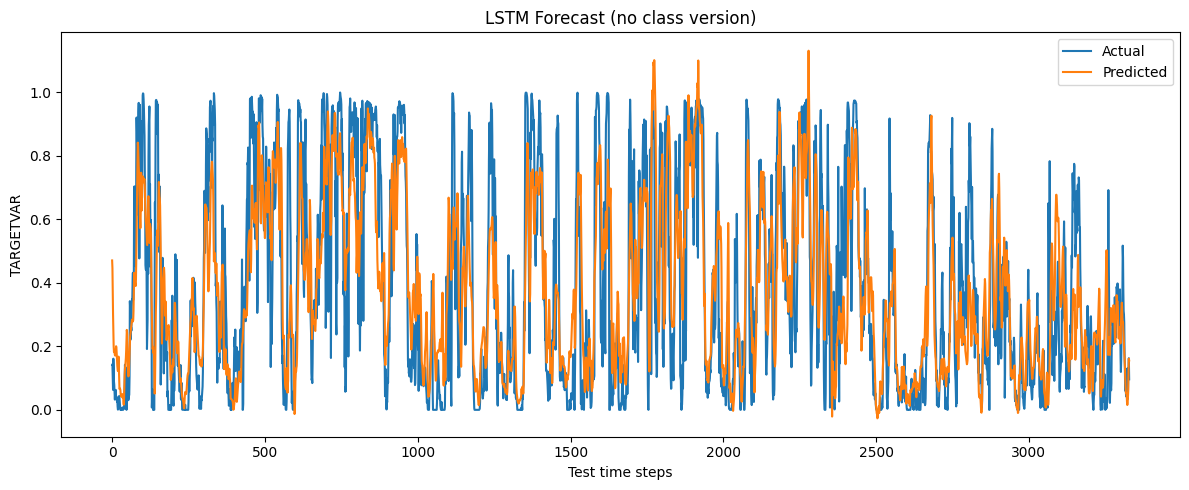

In [28]:


# =========================
# 3) Make sequences
# =========================
def make_sequences(X, y, lookback):
    X_seq, y_seq = [], []
    for i in range(lookback, len(X)):
        X_seq.append(X[i-lookback:i, :])
        y_seq.append(y[i, 0])
    return np.array(X_seq, dtype=np.float32), np.array(y_seq, dtype=np.float32).reshape(-1,1)

n_steps = 24
Xtr_seq, ytr_seq = make_sequences(X_train_s, y_train, n_steps)
Xte_seq, yte_seq = make_sequences(X_test_s,  y_test,  n_steps)

train_ds = TensorDataset(torch.from_numpy(Xtr_seq), torch.from_numpy(ytr_seq))
test_ds  = TensorDataset(torch.from_numpy(Xte_seq), torch.from_numpy(yte_seq))

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, drop_last=False)
test_loader  = DataLoader(test_ds,  batch_size=64, shuffle=False, drop_last=False)

# =========================
# 4) Model (no class, just layers)
# =========================

best_state = {
    "lstm": lstm_layer.state_dict(),
    "fc":   fc_layer.state_dict()
}

input_size = Xtr_seq.shape[2]
hidden_size = 128
num_layers = 2
dropout = 0.2

lstm_layer = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout)
fc_layer   = nn.Linear(hidden_size, 1)

criterion = nn.MSELoss()
params = list(lstm_layer.parameters()) + list(fc_layer.parameters())
optimizer = optim.Adam(params, lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=5)


# =========================
# 5) Train loop
# =========================
best_val = float("inf"); patience=100; bad=0
for epoch in range(100):
    lstm_layer.train(); fc_layer.train()
    train_loss=0.0
    for xb, yb in train_loader:
        out, _ = lstm_layer(xb)   # [B, T, H]
        out = out[:, -1, :]       # last timestep
        pred = fc_layer(out)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(params, max_norm=1.0)
        optimizer.step()
        train_loss += loss.item()*xb.size(0)
    train_loss /= len(train_ds)

    # validation
    lstm_layer.eval(); fc_layer.eval()
    val_loss=0.0
    with torch.no_grad():
        for xb, yb in test_loader:
            out, _ = lstm_layer(xb)
            out = out[:, -1, :]
            pred = fc_layer(out)
            val_loss += criterion(pred, yb).item()*xb.size(0)
    val_loss /= len(test_ds)
    scheduler.step(val_loss)

    if (epoch+1)%5==0:
        print(f"Epoch {epoch+1:3d} | train MSE {train_loss:.5f} | val MSE {val_loss:.5f}")

    if val_loss < best_val - 1e-6:
        best_val = val_loss; bad=0
        best_state = {
            "lstm": {k:v.cpu().clone() for k,v in lstm_layer.state_dict().items()},
            "fc":   {k:v.cpu().clone() for k,v in fc_layer.state_dict().items()}
        }
    else:
        bad += 1
        if bad >= patience:
            print("Early stopping.")
            break

lstm_layer.load_state_dict(best_state["lstm"])
fc_layer.load_state_dict(best_state["fc"])

# =========================
# 6) Predict & inverse-scale
# =========================
lstm_layer.eval(); fc_layer.eval()
preds, trues = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        out, _ = lstm_layer(xb)
        out = out[:, -1, :]
        pb = fc_layer(out)
        preds.append(pb.cpu().numpy())
        trues.append(yb.cpu().numpy())

y_pred = np.vstack(preds)
y_true = np.vstack(trues)

# y_pred = y_scaler.inverse_transform(y_pred_s).ravel()
# y_true = y_scaler.inverse_transform(y_true_s).ravel()

rmse = np.sqrt(np.mean((y_pred - y_true)**2))
mae  = np.mean(np.abs(y_pred - y_true))
mape = np.mean(np.abs((y_pred - y_true) / (np.maximum(np.abs(y_true), 1e-6)))) * 100
print(f"Test RMSE={rmse:.3f} | MAE={mae:.3f} | MAPE={mape:.2f}%")

plt.figure(figsize=(12,5))
plt.plot(y_true, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("LSTM Forecast (no class version)")
plt.xlabel("Test time steps")
plt.ylabel(TARGET_COL)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
print("y_train min/max:", y_train.min(), y_train.max())
print("X_train min/max:", X_train.min(), X_train.max())


y_train min/max: nan nan
X_train min/max: -15.29486582 16.98841799


In [ ]:
# =========================
# LSTM with Hyperparameter Tuning (Random Search)
# =========================
import numpy as np, random, math, torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from itertools import product

# ---- Reproducibility ----
SEED = 42
np.random.seed(SEED); random.seed(SEED); torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ---- Helpers ----
def make_sequences(X, y, lookback):
    X_seq, y_seq = [], []
    for i in range(lookback, len(X)):
        X_seq.append(X[i-lookback:i, :])
        y_seq.append(y[i, 0])
    X_seq = np.array(X_seq, dtype=np.float32)
    y_seq = np.array(y_seq, dtype=np.float32).reshape(-1, 1)
    return X_seq, y_seq

def build_loaders_from_split(X_tr_all, y_tr_all, X_test, y_test, lookback, batch_size, val_frac=0.2):
    """Chronologically split the *training* block into train_core and val."""
    n_tr = len(X_tr_all)
    val_len = max(1, int(val_frac * n_tr))
    X_core, y_core = X_tr_all[:n_tr - val_len], y_tr_all[:n_tr - val_len]
    X_val,  y_val  = X_tr_all[n_tr - val_len:], y_tr_all[n_tr - val_len:]

    Xtr_seq, ytr_seq = make_sequences(X_core, y_core, lookback)
    Xval_seq, yval_seq = make_sequences(X_val,  y_val,  lookback)
    Xte_seq, yte_seq   = make_sequences(X_test, y_test, lookback)

    train_ds = TensorDataset(torch.from_numpy(Xtr_seq), torch.from_numpy(ytr_seq))
    val_ds   = TensorDataset(torch.from_numpy(Xval_seq), torch.from_numpy(yval_seq))
    test_ds  = TensorDataset(torch.from_numpy(Xte_seq), torch.from_numpy(yte_seq))

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=False,  drop_last=False)
    val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, drop_last=False)
    test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False, drop_last=False)
    return train_loader, val_loader, test_loader, (Xtr_seq, ytr_seq, Xval_seq, yval_seq, Xte_seq, yte_seq)

class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=2, dropout=0.2):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers,
                            batch_first=True, dropout=dropout if num_layers > 1 else 0.0)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)         # (B, T, H)
        out = out[:, -1, :]           # last time step
        out = self.fc(out)            # (B, 1)
        return out

def train_and_validate(X_train_s, y_train, X_test_s, y_test,
                       n_steps, hidden_size, num_layers, dropout,
                       batch_size, lr, weight_decay,
                       max_epochs=100, patience=15):
    """Train one model with given hyperparameters; return best val RMSE + saved state."""
    input_size = X_train_s.shape[1]
    train_loader, val_loader, test_loader, _ = build_loaders_from_split(
        X_train_s, y_train, X_test_s, y_test, lookback=n_steps, batch_size=batch_size, val_frac=0.2
    )

    model = LSTMRegressor(input_size, hidden_size, num_layers, dropout).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=5)

    best_val = float("inf")
    best_state = None
    bad = 0

    for epoch in range(max_epochs):
        # --- train ---
        model.train()
        train_loss = 0.0
        for xb, yb in train_loader:
            xb = xb.to(device); yb = yb.to(device)
            pred = model(xb)
            loss = criterion(pred, yb)
            optimizer.zero_grad()
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            train_loss += loss.item() * xb.size(0)
        train_loss /= len(train_loader.dataset)

        # --- val ---
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.to(device); yb = yb.to(device)
                pred = model(xb)
                val_loss += criterion(pred, yb).item() * xb.size(0)
        val_loss /= len(val_loader.dataset)
        scheduler.step(val_loss)

        # --- early stopping bookkeeping ---
        if val_loss < best_val - 1e-7:
            best_val = val_loss
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
            bad = 0
        else:
            bad += 1

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1:3d} | train MSE {train_loss:.5f} | val MSE {val_loss:.5f}")
        if bad >= patience:
            # print("Early stopping.")
            break

    # restore best
    model.load_state_dict(best_state)
    return math.sqrt(best_val), model, test_loader  # return val RMSE (sqrt MSE), model, and test_loader for later

def evaluate_on_loader(model, data_loader):
    model.eval()
    preds, trues = [], []
    with torch.no_grad():
        for xb, yb in data_loader:
            xb = xb.to(device); yb = yb.to(device)
            pb = model(xb)
            preds.append(pb.detach().cpu().numpy())
            trues.append(yb.detach().cpu().numpy())
    y_pred = np.vstack(preds).reshape(-1)
    y_true = np.vstack(trues).reshape(-1)

    rmse = np.sqrt(np.mean((y_pred - y_true)**2))
    mae  = mean_absolute_error(y_true, y_pred)
    eps  = 1e-6
    # MAPE safe (and optional masked MAPE if you want to ignore near-zero hours)
    mape = np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), eps, None))) * 100.0
    smape = np.mean(2.0 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + eps)) * 100.0
    return y_true, y_pred, {"RMSE": rmse, "MAE": mae, "MAPE%": mape, "sMAPE%": smape}

# =========================
# Hyperparameter search space (small & sensible)
# =========================
search_space = {
    "n_steps":      [12, 24, 48],
    "hidden_size":  [64, 128],
    "num_layers":   [1, 2],
    "dropout":      [0.0, 0.2],
    "batch_size":   [32, 64],
    "lr":           [1e-3, 5e-4],
    "weight_decay": [0.0, 1e-4],
}
# Build all combos, sample a few for speed
keys = list(search_space.keys())
all_combos = list(product(*[search_space[k] for k in keys]))
MAX_TRIALS = min(12, len(all_combos))  # try up to 12 random configs
trial_idxs = random.sample(range(len(all_combos)), MAX_TRIALS)

results = []
best = {"val_rmse": float("inf"), "cfg": None, "model": None, "test_loader": None}

print(f"Trying {MAX_TRIALS} random configs out of {len(all_combos)}...")

for t, idx in enumerate(trial_idxs, 1):
    cfg_tuple = all_combos[idx]
    cfg = {k: v for k, v in zip(keys, cfg_tuple)}
    print(f"\n[Trial {t}/{MAX_TRIALS}] {cfg}")

    val_rmse, model, test_loader = train_and_validate(
        X_train_s, y_train, X_test_s, y_test,
        n_steps=cfg["n_steps"],
        hidden_size=cfg["hidden_size"],
        num_layers=cfg["num_layers"],
        dropout=cfg["dropout"],
        batch_size=cfg["batch_size"],
        lr=cfg["lr"],
        weight_decay=cfg["weight_decay"],
        max_epochs=100, patience=15
    )

    results.append((val_rmse, cfg))
    print(f"→ Val RMSE: {val_rmse:.5f}")

    if val_rmse < best["val_rmse"]:
        best.update({"val_rmse": val_rmse, "cfg": cfg, "model": model, "test_loader": test_loader})

print("\nBest config by Val RMSE:")
print(best["cfg"])
print(f"Best Val RMSE: {best['val_rmse']:.5f}")

# =========================
# Final evaluation on TEST with the best model
# =========================
y_true, y_pred, metrics = evaluate_on_loader(best["model"], best["test_loader"])
print("\n=== TEST METRICS (best config) ===")
for k, v in metrics.items():
    if "MAPE" in k:
        print(f"{k:8s}: {v:.2f}")
    else:
        print(f"{k:8s}: {v:.6f}")




Using device: cpu
Trying 12 random configs out of 192...

[Trial 1/12] {'n_steps': 48, 'hidden_size': 128, 'num_layers': 1, 'dropout': 0.0, 'batch_size': 32, 'lr': 0.0005, 'weight_decay': 0.0001}
Epoch  10 | train MSE 0.06218 | val MSE 0.05047
Epoch  20 | train MSE 0.05420 | val MSE 0.04605
Epoch  30 | train MSE 0.04341 | val MSE 0.04113
Epoch  40 | train MSE 0.03974 | val MSE 0.03977
Epoch  50 | train MSE 0.03854 | val MSE 0.03937
Epoch  60 | train MSE 0.03765 | val MSE 0.03899
Epoch  70 | train MSE 0.03696 | val MSE 0.03854
Epoch  80 | train MSE 0.03641 | val MSE 0.03833
Epoch  90 | train MSE 0.03591 | val MSE 0.03821
Epoch 100 | train MSE 0.03544 | val MSE 0.03806
→ Val RMSE: 0.19510

[Trial 2/12] {'n_steps': 12, 'hidden_size': 64, 'num_layers': 2, 'dropout': 0.2, 'batch_size': 64, 'lr': 0.001, 'weight_decay': 0.0}
Epoch  10 | train MSE 0.05272 | val MSE 0.05248
Epoch  20 | train MSE 0.04123 | val MSE 0.04187
Epoch  30 | train MSE 0.03864 | val MSE 0.03920
Epoch  40 | train MSE 0.03

TypeError: got an unexpected keyword argument 'squared'

Persistence RMSE: 0.110431 | Skill vs Persistence: -98.27%


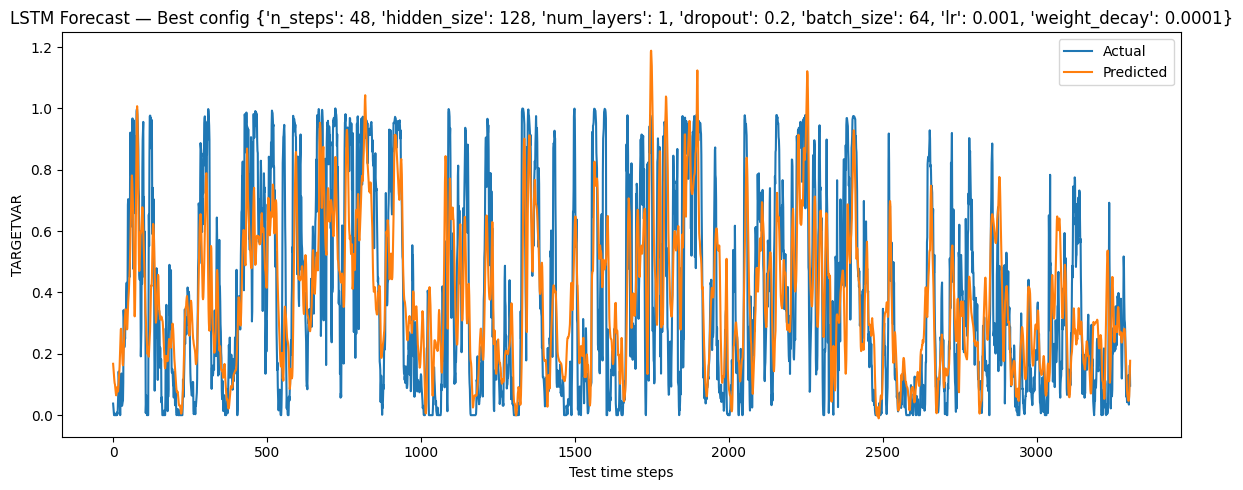

In [8]:
# Optional: compare to persistence baseline (predict y_{t-1})
y_pers = np.r_[y_true[:1], y_true[:-1]]
rmse_model = metrics["RMSE"]
rmse_pers = np.sqrt(np.mean((y_pers - y_true)**2))
#rmse_pers  = mean_squared_error(y_true, y_pers, squared=False)
skill = 100 * (1 - rmse_model / (rmse_pers + 1e-12))
print(f"Persistence RMSE: {rmse_pers:.6f} | Skill vs Persistence: {skill:.2f}%")

# Plot
plt.figure(figsize=(12,5))
plt.plot(y_true, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title(f"LSTM Forecast — Best config {best['cfg']}")
plt.xlabel("Test time steps")
plt.ylabel(TARGET_COL)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
import torch

save_path = "lstm_best.pth"

checkpoint = {
    "model_state": best["model"].state_dict(),  # trained LSTMRegressor
    "cfg": best["cfg"],                         # hyperparams: hidden_size, num_layers, dropout, n_steps, etc.
    "n_features": X_train_s.shape[1],           # input feature count
    "lookback": best["cfg"]["n_steps"],         # window length used
    "scaler": x_scaler,                         # your MinMaxScaler for X
    "model_class": "LSTMRegressor",             # just a note for loading
}
torch.save(checkpoint, save_path)
print(f"Saved -> {save_path}")


Saved -> lstm_best.pth
